# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/sound_classifier /mydrive

# navigate to the working directory
%cd /mydrive

ln: failed to create symbolic link '/mydrive/sound_classifier': File exists
/content/gdrive/My Drive/Colab Notebooks/sound_classifier


## Import libraries

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import IPython.display as display
import tqdm.notebook as tq

# Dataset
Environment Sound Classification

## Import

In [4]:
!git clone https://github.com/karolpiczak/ESC-50.git

fatal: destination path 'ESC-50' already exists and is not an empty directory.


In [5]:
# path to csv file containing meta data for the dataset
META_CSV = './ESC-50/meta/esc50.csv'

# path to folder containing audio files
AUDIO_PATH = './ESC-50/audio/'



In [6]:
df = pd.read_csv(META_CSV)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


# Helper functions

In [7]:
def plot_signal_and_spectogram(data_array, samplerate):
    fig, axs = plt.subplots(1, 2, figsize=(22, 5))
    fig.subplots_adjust(hspace = .1, wspace=.2)
    axs = axs.ravel()
    x = range(len(data_array))
    y = data_array
    axs[0].plot(x, y)
    axs[0].grid()
    axs[1].specgram(data_array,Fs=samplerate, mode='psd', scale='dB')
    axs[0].set_title('Signal')
    axs[0].set_xlabel('Sample')
    axs[0].set_ylabel('Amplitude')
    axs[1].set_title('Spectogram')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Frequency')
    plt.grid()

def save_spectogram(filename):
    filepath = AUDIO_PATH+filename
    clip, sample_rate = librosa.load(filepath, sr=None)
    plt.specgram(clip, Fs=sample_rate, mode='psd', scale='dB')
    plt.axis('off')
    plt.savefig(
        SPECTOGRAM_PATH+filename.split('.')[0]+'.png',
        dpi=300,
        bbox_inches = 'tight',
        pad_inches = 0)
    
def listen_example(filepath):
    return display.Audio(filepath)

def get_file_list(category):
    file_list = data[data['category']==category]['filename'].to_list()
    return file_list

# Exploratory Data Analysis

## Categories

In [8]:
df['category'].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

## Sample file

In [9]:
# generate random integer
random_int = np.random.randint(0, high=df.shape[0])
# select a  row
row = df.iloc[random_int]
# generate a filepath
filepath = AUDIO_PATH+row['filename']

# open the audio file
clip, sample_rate = librosa.load(filepath, sr=None)

print('Category:     {}'.format(row['category']))
print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(len(clip)/sample_rate))

Category:     clock_alarm
Sample Rate   44100 Hz
Clip Length   5.00 seconds


## Preview audio

In [10]:
listen_example(filepath)

## Signal & spectogram

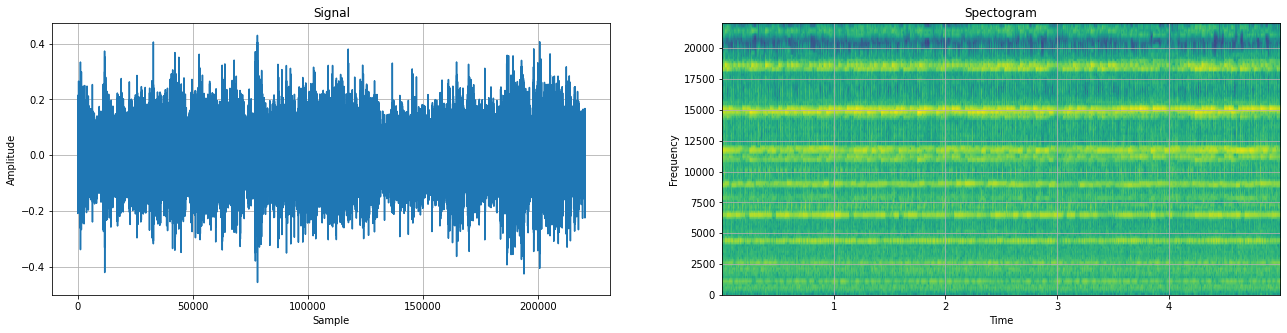

In [11]:
plot_signal_and_spectogram(clip, sample_rate)

# Preprocessing

## Save spectograms

In [ ]:
# path to folder containing audio files
SPECTOGRAM_PATH = './ESC-50/spectogram/'

for filename in tq.tqdm(df['filename']):
  save_spectogram(filename)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


# Classificator